In [428]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# <center> Learning Curves </center>

1. What Learning Curves Show and Mean
    * Learning curves plot model performance vs training set size, showing how your model behaves as it gets more data.
    * What they reveal:
        * Training curve: How well the model fits the data it's trained on
        * Validation curve: How well the model generalizes to unseen data
        * The gap between them: Indicates overfitting/underfitting
        * Convergence behavior: Whether more data would help

2. What Good Learning Curves Look Like

    * Training curve:
        * Starts low (easy to fit small datasets)
        * Gradually decreases as training set grows (harder to perfectly fit more data)
        * Levels off at some minimum error

    * Validation curve:
        * Starts high (poor generalization with little data)
        * Steadily improves as training set grows
        * Converges toward training curve

    * Gap between curves:
        * Small, stable gap - indicates good generalization (if around a low value)
        * Curves converge - model is neither overfitting nor underfitting

3. What Bad Learning Curves Look Like
    * High Variance (Overfitting):
        * Large gap between training and validation curves
        * Training error much lower than validation error
        * Gap doesn't close even with more data
        * <b> Solution: More data, regularization, simpler model </b>

    * High Bias (Underfitting):

        * Both curves plateau at poor performance levels
        * Small gap but both curves are "stuck" high
        * More data doesn't help much
        * <b> Solution: More complex model, better features </b>

    * Poor Convergence:

        * Jagged, volatile curves (like your first custom logistic regression)
        * No clear pattern or trend
        * <b> Solution: Better optimization, tune hyperparameters </b>

    * Not Enough Data:

        * Both curves still improving significantly at the end
        * No plateau reached yet
        * <b> Solution: Collect more data </b>

4. Summary:
    * What learning curve really excels at is:
        1. diagnosing bias vs. variance problems,
        2. telling you if regularization is too strong or too weak,
        3. showing if more training samples would help.
    * So it’s more of a diagnostic tool than a model selection tool.

In [429]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=3, scoring='neg_mean_squared_error', ax=None, label='', show_error_bands=False):

    if ax is None:
        ax = plt.gca()

    train_sizes, train_scores, val_scores = learning_curve(
        estimator=model,
        X=X,
        y=y,
        train_sizes=train_sizes,
        cv=cv,
        scoring=scoring,
        shuffle=True,
        random_state=42,
        n_jobs=-1,
    )
    
    training_scores_mean = np.mean(train_scores, axis=1)
    validation_scores_mean = np.mean(val_scores, axis=1)

    if 'neg' in scoring:
        training_scores_mean = -training_scores_mean
        validation_scores_mean = -validation_scores_mean
    
    ax.plot(train_sizes, training_scores_mean, label=f'Training {label}', marker='o')
    ax.plot(train_sizes, validation_scores_mean, label=f'Validation {label}', marker='s')

    if show_error_bands:
        trainining_scores_std = np.std(train_scores, axis=1)
        validation_scores_std = np.std(val_scores, axis=1)

        ax.fill_between(train_sizes, (training_scores_mean - trainining_scores_std), (training_scores_mean + trainining_scores_std), alpha=0.2)
        ax.fill_between(train_sizes, (validation_scores_mean - validation_scores_std), (validation_scores_mean + validation_scores_std), alpha=0.2)
        
    ax.set_title(f'Learning Curve\n{str(model)}')
    ax.set_xlabel('Training Set Size')
    ax.set_ylabel(f'{label}')
    ax.legend()
    ax.grid()

# <center> Prepare the data and plot the learning curves </center>

##### We will be running four different models to compare their learning curves:
1. Linear Regression (always a good base model)
2. Ridge Regression (default alpha=1)
3. Lasso Regression (default alpha=1)
4. ElasticNet (default alpha=1)

In [430]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

data = load_diabetes(as_frame=True)


features = data.data
target = data.target


X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.25, random_state=42, shuffle=True
)

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge

lr = LinearRegression()
ridge = Ridge()

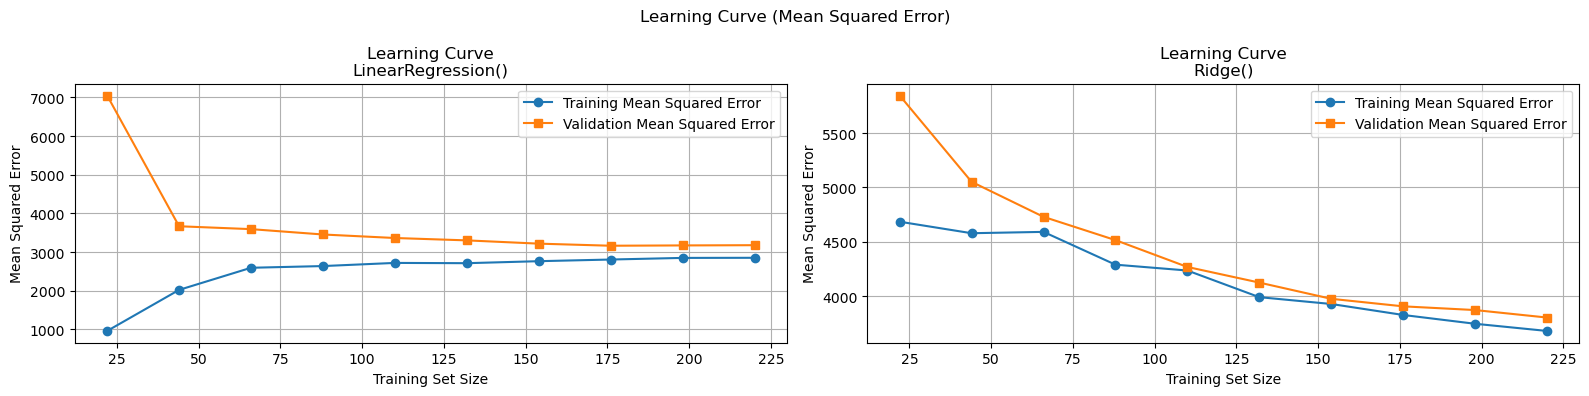

In [454]:
figure, axes = plt.subplots(1, 2, figsize=(16, 4))
axes = axes.flatten()

plot_learning_curve(lr, X_train, y_train, scoring='neg_mean_squared_error',
                    ax=axes[0], label='Mean Squared Error')
plot_learning_curve(ridge, X_train, y_train, scoring='neg_mean_squared_error',
                    ax=axes[1], label='Mean Squared Error')

figure.suptitle('Learning Curve (Mean Squared Error)')
plt.tight_layout()

* <b> Linear regression </b>:
    - On the other hand, the Linear Regression model training and validation curves converge on a much better value (around 3,000)
    - Linear regression model is the one to beat.
    - The final value at which Training and Validation errors converge at is the best.
    - The gap between training and validation errors is quite small (which indicates good generalization to new data)

* <b> Ridge Regression </b>:

    - The curve that I like at first look is the Ridge curve (top right).
    - The reason is both training and validatin curves are decrease with increasing training set size. <br>
    - Also, the gap between the training and validation errors is quite small (perhaps even the smallest)
    - <b> However, at a second look, both training and validatin ended at a high value of MSE (around 3,800). (high bias) </b>
    - <b>It looks like both are still decreasing, so more data will help Ridge (with alpha=1)</b>

* <b> Lasso </b>:
    - Larger gap between training and validation errors (indicates slightly more overfitting)
    - <b> Errors converge at a high MSE (just like Ridge) at around 4,000 (high bias) </b>

* <b> Elastic Net </b>:
    - <b> Converges at the highest error value (around 6,000) (high bias)</b>

* Ridge model have two issues:
    1. The curves are both still decreasing. This suggests it needs more data
    2. For the current data fed to the ridge model, it's still at a high value of MSE

* I'm going to give the ridge model more data, and see if there's convergance reached

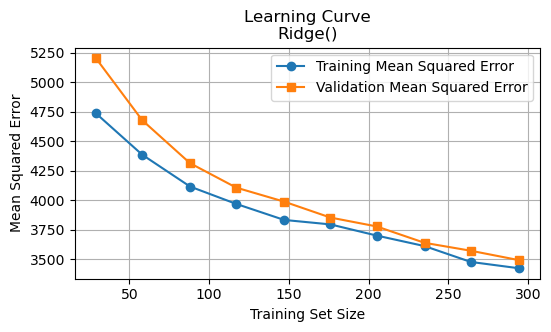

In [433]:
ridge = Ridge()
plt.figure(figsize=(6, 3))
plot_learning_curve(ridge, features, target, scoring='neg_mean_squared_error',  label='Mean Squared Error')

* So that didn't work.
    - Even giving the model my entire dataset, it's still decreasing.
    - It's also still at a higher MSE than Linear Regression. Meaning it's suffering from high bias (compared to our base Linear Regression model)

* The default regularization strength (how much the model punishes incorrect prediction) for Ridge is `alpha=1`
* If we understand this value as high, it means that the model has become too simple for the data. Hence, the high error value.
* Let's reduce the regularization strength, which would mean that the model regains complexity and flexibity in fitting and understanding the data 

* This is where validation curve comes in.

# <center> Validation Curve </center>

1. What Validation Curves Show and Mean
    * Definition: Validation curves plot model performance vs. one hyperparameter value, holding everything else fixed (`alpha` in Ridge).

    * What they reveal:
        * Training curve: How well the model fits as the hyperparameter changes.
        * Validation curve: How well the model generalizes for each hyperparameter setting.
        * The gap between them: Indicates overfitting (gap large) or underfitting (both low).
        * Sweet spot: The hyperparameter value where validation score is maximized (or error minimized).

2. What Good Validation Curves Look Like
    * Training curve:
        * High when hyperparameter allows enough flexibility, but not unrealistically high.
        * Shows a smooth pattern across hyperparameter values.
    * Validation curve:
        * Peaks (for scores) or bottoms out (for errors) at some hyperparameter value.
        * Lies close to the training curve near the optimum.
    * Gap between curves:
        * Smallest near the optimal hyperparameter value.
        * Shows a clear balance of bias and variance.

3. What Bad Validation Curves Look Like
    * High Variance (Overfitting)
        * Pattern:
            * Training score very high, validation score much lower.
            * Gap widens as the model complexity increases (e.g., small regularization in Ridge).
        * <b> Solution: Increase regularization strength, reduce complexity, or add data. </b>

    * High Bias (Underfitting)
        * Pattern:
            * Both training and validation scores low (or both errors high).
            * Gap small, but performance poor across all hyperparameter values.
        * <b> Solution: Decrease regularization, use a more flexible model, add better features. </b>

    * No Clear Peak
        * Pattern:
            * Validation curve flat → hyperparameter has little or no effect.
            * Training and validation curves almost identical.
        * <b> Solution: Tune a different hyperparameter or try a different model. </b>

    * Unstable / Noisy Curves
        * Pattern:
            * Jagged curves with inconsistent validation scores across neighboring values.
            * Suggests too few folds, too little data, or high data noise.
        * <b> Solution: Increase CV folds, smooth the curve, or collect more data. </b>

* TLDR: The validation curve shows the effect of a single hyperparameter (all other parameters are constant) on the training and validation errors

In [434]:
from sklearn.model_selection import validation_curve

ridge = Ridge()


def plot_validation_curve(model, X, y, param_name, param_range, cv=3, ax=None, scoring='neg_mean_squared_error', label='', show_error_bands=True):
    training_scores, validation_scores = validation_curve(
        model, X, y, param_name=param_name, param_range=param_range, cv=cv, scoring=scoring, n_jobs=-1)

    if ax is None:
        ax = plt.gca()

    train_mean = np.mean(training_scores, axis=1)
    val_mean = np.mean(validation_scores, axis=1)

    # if the scoring method is a negative, flip the sign
    if 'neg' in scoring:
        train_mean = -train_mean
        val_mean = -val_mean

    # plot score for each param value
    ax.plot(param_range, train_mean, label=f'Training {label}')
    ax.plot(param_range, val_mean, label=f'Validation {label}')


    if show_error_bands:
        # Plot validation scores
        train_std = np.std(training_scores, axis=1)
        val_std = np.std(validation_scores, axis=1)

        # Plot error bands
        ax.fill_between(param_range, train_mean - train_std, train_mean + train_std, 
                        alpha=0.1, color='blue')
        ax.fill_between(param_range, val_mean - val_std, val_mean + val_std, 
                        alpha=0.1, color='red')

    # Formatting
    ax.set_xscale('log')
    ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:g}'))  # not necassary. just change scientific notation to decimals
    ax.set_xlabel(f'{param_name}')
    ax.set_ylabel(f'{label}')
    ax.set_title(f'Validation Curve ({label})')
    ax.legend()
    ax.grid()

* So now, we will give the model a range of values for `alpha` and see how the training and validation errors react.
* The value `alpha=1` will be included to see confirm our previous result that the model is not good for this value.

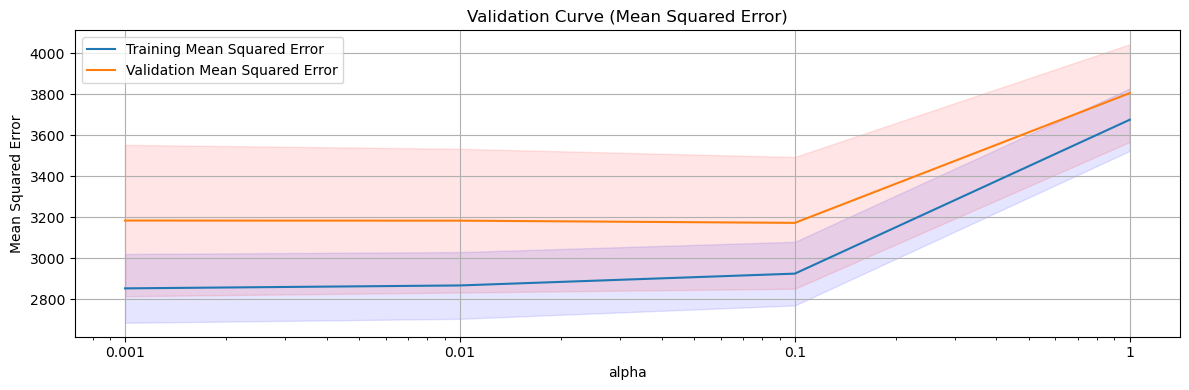

In [435]:
alpha_range = [0.001, 0.01, 0.1, 1]

figure, axes = plt.subplots(1, 1, figsize=(12, 4))

plot_validation_curve(ridge, X_train, y_train, param_name='alpha', param_range=alpha_range,
                      scoring='neg_mean_squared_error', label='Mean Squared Error', ax=axes)

plt.tight_layout()

* As expected, `alpha=1` leads to an increase in the Mean Squared Error for both training and validation curves.
* Values of `alpha` between 0.001 and 0.1 have lower value for the Mean Squared Error.
* Let's plot the learning curve for these values along with our base Linear Regressioin model.

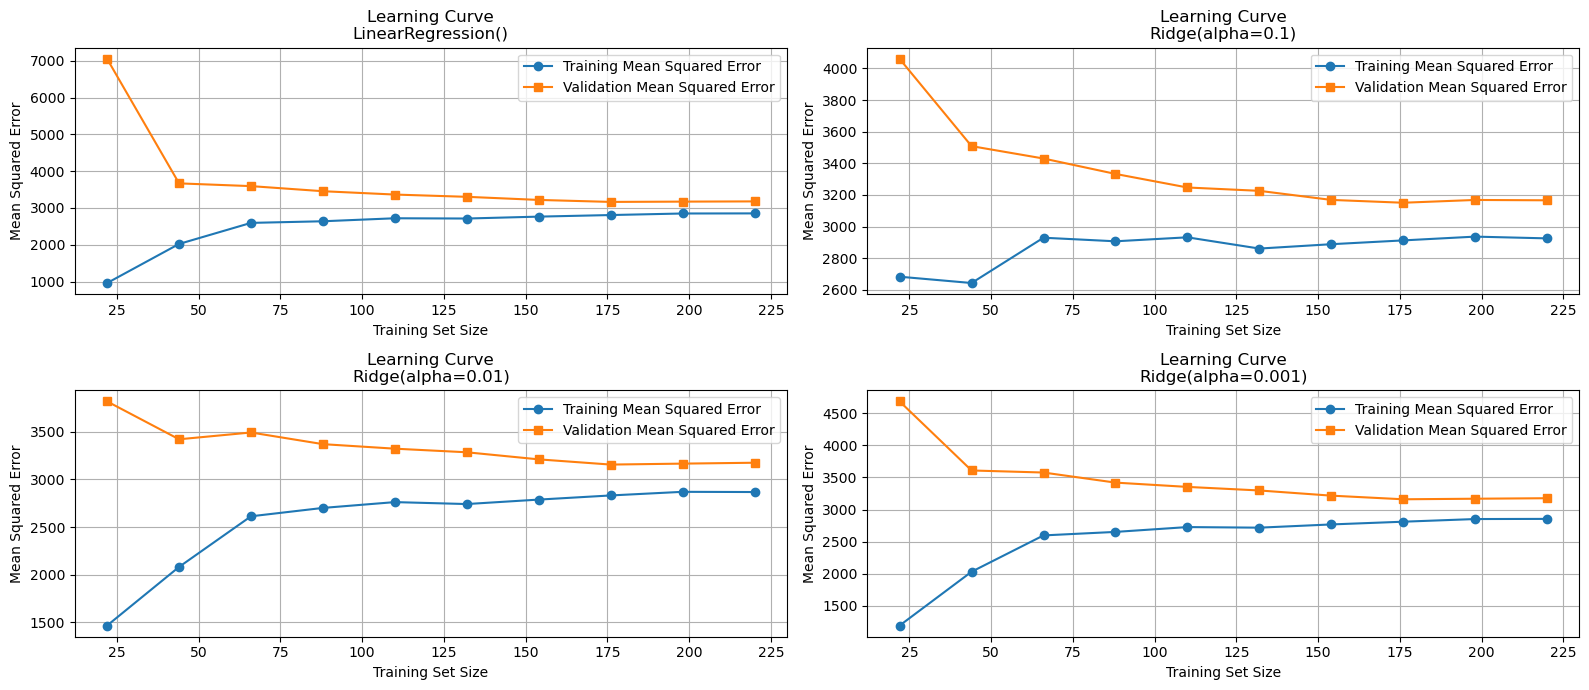

In [436]:
figure, axes = plt.subplots(2, 2, figsize=(16, 7))
axes = axes.flatten()

plot_learning_curve(LinearRegression(), X_train, y_train, scoring='neg_mean_squared_error', label='Mean Squared Error', ax=axes[0])
plot_learning_curve(Ridge(alpha=0.1), X_train, y_train, scoring='neg_mean_squared_error', label='Mean Squared Error', ax=axes[1])
plot_learning_curve(Ridge(alpha=0.01), X_train, y_train, scoring='neg_mean_squared_error', label='Mean Squared Error', ax=axes[2])
plot_learning_curve(Ridge(alpha=0.001), X_train, y_train, scoring='neg_mean_squared_error', label='Mean Squared Error', ax=axes[3])

plt.tight_layout()

#### Previous issues:
1. First issue was Ridge model is requiring more data (it didn't converge and kept decreasing)
    * We can now see that all of these alpha values stopped the model from requiring more data
    * Remember the learning curve when using the entire dataset (not just the training set). <br><br><br>

    * 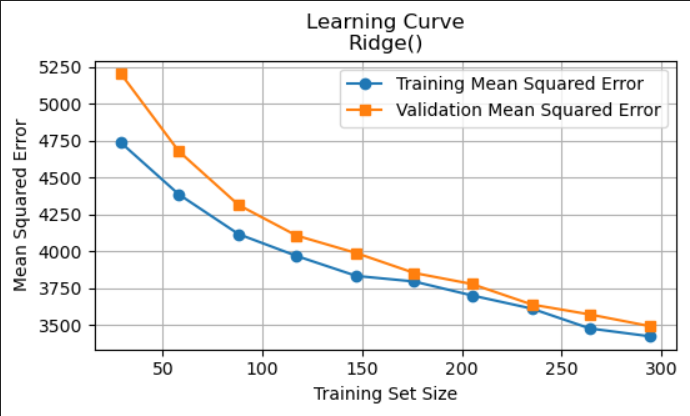

    * This showed that with `alpha=1`, our model was too simple (high bias) and hence required more data than we have, to compensate for it's simplicity.
    * Now with less regularization, the model regains complexity and is able to learn better with the training set only.
<br><br>

2. Second issue was that Ridge model was at a high MSE at the end of the curve.
    * Now, the training and validations error converge at a much lower value (~3,000)

#### New issue:
* Now that the bias has been lowered (MSE converges at smaller value), there's the issue of variance.
* The gap between training and validation curves at the end, refers to variance.
    - If the gap is large, then variance is high with low bias (overfit)
    - If the gap is small, then variance is low (ideal scenario - the model will generalize well to new data)
* We see that the gap is smallest with `alpha=0.001`
    - This makes sense since the Ridge model becomes an regular Linear Regression model when `alpha=0`.
    - So as we decrease alpha, we're getting closer to a Linear Regression.
    - Linear Regression is the model that performed best according to our first learning curve.

# <center> Final choice </center>
As per the learning curves of different `alpha` values, I'm going with `Ridge(alpha=0.001)` as my model.

In [459]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold

ridge_cv = Ridge()

param_grid = {
    'alpha': [0.001, 0.005, 0.01, 0.05, 0.1]
}

cv = RepeatedKFold(n_splits=20, n_repeats=10, random_state=42)

grid_search = GridSearchCV(ridge_cv, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error').fit(X_train, y_train)

print(grid_search.best_params_)
print(-grid_search.best_score_)

{'alpha': 0.05}
3117.932813860272


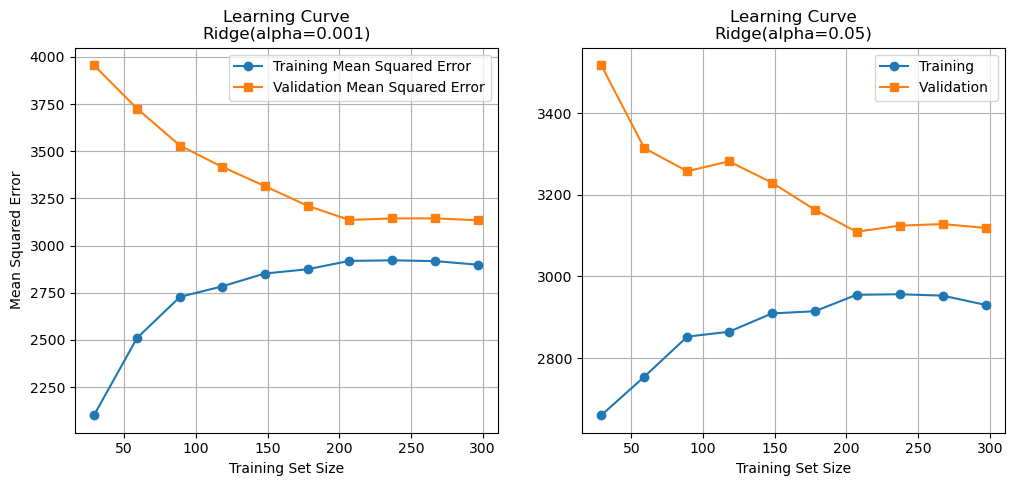

In [447]:
figure, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_learning_curve(Ridge(0.001), X_train, y_train, cv=cv, ax=axes[0], label='Mean Squared Error')
plot_learning_curve(Ridge(0.05), X_train, y_train, cv=cv, ax=axes[1])

In [439]:
# import seaborn as sns

# biases, variances, errors = [], [], []


# def bias_variance_decomp(model, X, y, n_rounds=50, test_size=0.25):
#     predictions = []
#     y_tests = []

#     for _ in range(n_rounds):
#         X_train, X_test, y_train, y_test = train_test_split(
#             X, y, test_size=test_size, shuffle=True
#         )
        
#         model.fit(X_train, y_train)
#         preds = model.predict(X_test)
        
#         predictions.append(preds)
#         y_tests.append(y_test)

#     predictions = np.array(predictions)
#     y_tests = np.array(y_tests)

#     avg_preds = predictions.mean(axis=0)

#     bias = np.mean((y_tests - avg_preds) ** 2)
#     variance = np.mean(np.var(predictions, axis=0))
#     error = bias + variance
    
#     return bias, variance, error


# alpha_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]


# for alpha in alpha_range:
#     bias, variance, error = bias_variance_decomp(Ridge(alpha), features, target, test_size=0.25)
#     biases.append(bias)
#     variances.append(variance)
#     errors.append(error)
#     print(f'alpha = {alpha} \t Bias: {bias:.0f} | Variance: {variance:.0f} | Error: {error:.0f}')


# sns.lineplot(x=alpha_range, y=biases,  marker='o', label='Bias')
# sns.lineplot(x=alpha_range, y=variances, marker='o', label="Variance")
# sns.lineplot(x=alpha_range, y=errors, marker='o', label="Total Error", linewidth=2)
# plt.xscale('log')  # log scale helps since alphas vary exponentially
# plt.xlabel("Alpha (log scale)")
# plt.ylabel("Error")
# plt.title("Bias-Variance Tradeoff for Ridge Regression")
# plt.legend()
# plt.grid(True)
# plt.show()

In [449]:
# from sklearn.metrics import mean_squared_error

# first = Ridge(alpha=0.1).fit(X_train, y_train)
# second = Ridge(alpha=0.01).fit(X_train, y_train)
# third = Ridge(alpha=0.001).fit(X_train, y_train)

# pred_1 = first.predict(X_test)
# pred_2 = second.predict(X_test)
# pred_3 = third.predict(X_test)

# print(mean_squared_error(y_test, pred_1))
# print(mean_squared_error(y_test, pred_2))
# print(mean_squared_error(y_test, pred_3))